# New tasks:
- make a function that read a fasta file from disk and yields (header, seq) pairs +
- ex from:
>AB003409.1/96-167
GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comment
CCAGUGGGUCCA
>AB009835.1/1-71
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
- yield:
(AB003409.1/96-167, GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA)
(AB009835.1/1-71,CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU)

- make a function that receives in input the list of sequences, and yields structure graphs +
- make a function that receives a iterator over graphs and i,j and plots only graphs from num i to num j


1. test if space or tab
2. test if command (after a space or any latter exept 'aucg' or 'rnytkmswbdhvgu')
3. test if new line without header then concatenate
4. test if new line with header then new graph

## comments are not working

In [54]:
%matplotlib inline
import os, sys
import subprocess as sp
from itertools import cycle
import networkx as nx
import re
from eden.util import display

class FastaToGraph(object):
    def __init__(self):
        pass
    
    def SequeceWrapper(self, path):
        #path = "/home/alsheikm/Work/EDeN_examples/fastaFiles/"
        seq = self._readFastaFile(path)
        #seqs = self._removeCommends(seq)
        #print ("path", path)
        return seq
    
# read a fasta file separate the head and the sequence
#    def _readFastaFile(self, file_name):
# read a fine not a directory

    def _readFastaFile(self, path):
#        path = "/home/alsheikm/Work/EDeN_examples/fastaFiles/"
        head_start = '>'
        heads = []
        seq = []
        seq_temps = []
        string_seq = ''
        

        for file in os.listdir(path):
            #open file
            read_file = open(os.path.join( path, file),'r')
            print file
            
            # seperate the head and the sequence
            for line in read_file:
                lines = list(line)
                # the read line is the head of the sequence write it in head list
                if lines[0] == head_start:
                    line = line.split(head_start)
                    print line
                    #heads.append(line)
                    #seq.append(string_seq)
                    
                    #print ('head')
                    
                    #print ("head", head)

                    
                    heads.append(line)
                    seq.append(string_seq)
                    print ("seq1", seq)
                    seq_temps = []
                    #print ("head", head)

                # the read line is a sequence writ it in a sequence list
                if lines[0] != head_start:
                    seq_temps.append(line)
                    print ("seq_temps", seq_temps)
                    string_seq= str(seq_temps)
                    print ("string_seq", string_seq)
                    print ("seq2", seq)

            seq.append(string_seq)      
            print ('heads', heads)
            print ("seq", seq)
                    
                    
                    
                    
                         ####this commends are not working

                    
                # the read line is a sequence writ it in a sequence list
                #if lines[0] != head_start:
                    
                    #print ('sequance')
                    #seq.append(seq_temp)
                    #print ('seq_seq_temp',seq_temp)
                    #string_seq = string_seq + line
                    #seq2.append(string_seq)                    
                    #print ("string_seq", string_seq)


                    #print ("seq", seq)
                   
                    
                    
                    #seq_temp.append(line)
                    #string_seq= str(seq_temp)
                    #print ('########')
                #seq_temp.append(string_seq)
                #print ("seq_temp", seq_temp)
                    #seq.append(string_seq)
            #seq.append(seq_temp)
            #seq_temp = []
                #string_seq = ''
                    
                    
                  
            #print ('head', heads)
            #print ("seq", seq)
            
            return seq, heads
    
    #read a line ignore string after the whitspace, tab and not (a,c,g,u)
    def _removeCommends(self, seq):
        seq_list = []
        not_added_string = []
        input_seqs = seq
        seqs = []
        
        #print ("string seq2:", seq)
        for seq in input_seqs:
            for i, letter in enumerate(seq):
                seq = str(seq)                  
                if letter == "A" or letter == "C" or letter == "G" or letter == "U":
            #    if letter == {'a','c','g','u'}:
                    letters = list(letter)
                    seq_list = seq_list + letters
                    #print ('new_seq:', seq_list)
                    #print '******'

                else:
                    if letter == " " or letter != "A" or letter != "C" or letter != "G" or letter != "U":
                        letters = list(letter)
                        not_added_string = not_added_string + letters
                        #print ('not_added:', not_added)
                        #print '-----'
        seqs.append(seq_list)
        print ("seqs",seqs)
                #print ("seq_remove:",seq)        
        print ('final not_added:', not_added_string)
        #print ('final seq_list:', seq_list)

        return seqs

#generate the graph for each read sequence
    def _makeFastaGraph(self, seq):
        G = nx.Graph()
        for j,sequence in enumerate(seq):
    #        print ('j', j)
            print ("sequence", sequence)
            sequences = list(sequence)
            for i,letter in enumerate(sequences):
                G.add_node(i, label = sequences[i])
                if i > 0:
                    G.add_edge(i-1, i, label = 'x')
            return G

# Experiment

In [55]:
#Read fasta files and separate sequences from the head of the sequence
fgraph = FastaToGraph()
path = "/home/alsheikm/Work/EDeN_examples/fasta/"
seqs = fgraph.SequeceWrapper(path)

testfasta~
['', 'AB003409.1/96-167\n']
('seq1', [''])
('string_seq', "['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments\\n']")
('seq2', [''])
('string_seq', "['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments\\n', 'CCAGUGGGUCCA\\n']")
('seq2', [''])
['', 'AB009835.1/1-71\n']
('seq1', ['', "['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments\\n', 'CCAGUGGGUCCA\\n']"])
('string_seq', "['CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU\\n']")
('seq2', ['', "['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments\\n', 'CCAGUGGGUCCA\\n']"])
('string_seq', "['CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU\\n', 'ACUUCUAAUGA\\n']")
('seq2', ['', "['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments\\n', 'CCAGUGGGUCCA\\n']"])
('heads', [['', 'AB003409.1/96-167\n'], ['', 'AB009835.1/1-71\n']])
('seq', ['', "['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comm

('sequence', [])


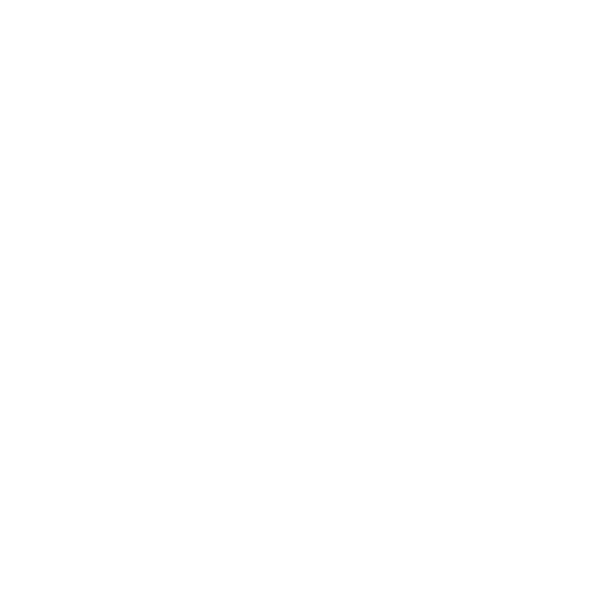

('sequence', ['', 'AB003409.1/96-167\n'])

Graphviz layout with neato failed
()
To debug what happened try:
P=pydot_from_networkx(G)
P.write_dot("file.dot")
And then run neato on file.dot


TypeError: 'NoneType' object has no attribute '__getitem__'

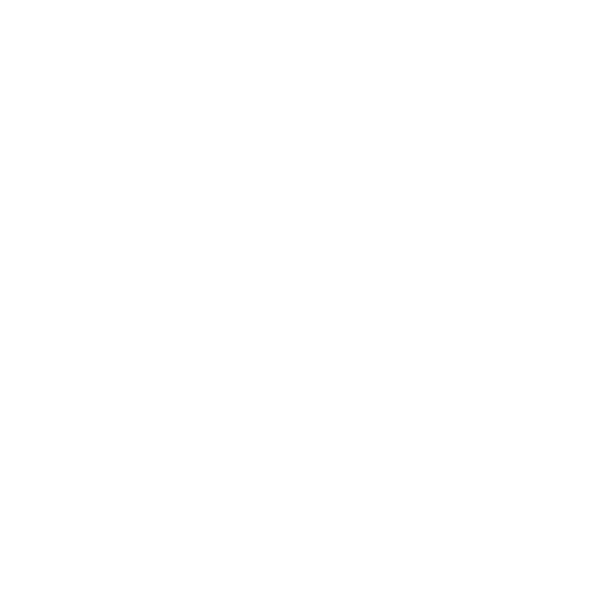

In [28]:
#generating the graph
for seq in seqs:
    G = fgraph._makeFastaGraph(seq)
    display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')